## Imports

In [3]:
!pip install imblearn

     |████████████████████████████████| 167 kB 32.7 MB/s 
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [4]:
# General
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ML

from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier

# Custom
import sys,os
sys.path.append( '.' )
sys.path.append( '..' )
import Components.Outlier_Detection as Outlier_Detection
import Components.Feature_Selection as Feature_Selection
import Components.Normalisation as Normalisation
import Components.data_fetching as data_fetching
import Components.Data_Augmentation as Data_Augmentation
import Components.wrapper as wrapper
import Components.two_step_utils as two_step_utils



# CAREFUL:
# If you make changes to a custom module, you have to reload it, i.e rerun this cell
import importlib
importlib.reload(Data_Augmentation)
importlib.reload(Outlier_Detection)
importlib.reload(Feature_Selection)
importlib.reload(Normalisation)
importlib.reload(data_fetching)
importlib.reload(wrapper)
importlib.reload(two_step_utils)

<module 'Components.two_step_utils' from '../Components/two_step_utils.py'>

## Data Preprocessing

### Data Import

In [5]:
X, y = data_fetching.get_train_data()
x_test = data_fetching.get_test_data()



In [ ]:
print(X.head())

        0         1         2         3         4         5         6    \
0 -1.498973  1.448201  2.784979  1.905992  1.285007 -0.571679  1.253798   
1 -0.521470 -0.493049  0.891382 -0.080855  0.227825 -0.167394 -0.426608   
2 -0.417724 -0.019106  0.938377 -0.670472  0.298922  0.917788  0.189585   
3 -0.471972  0.000398  0.784836  1.088817 -0.436292  0.023086  0.611958   
4  0.201026 -0.579901  0.638809 -0.614121  0.468388  0.535726  0.271890   

        7         8         9    ...       990       991       992       993  \
0 -2.590709  1.379211 -1.553323  ...  2.638401 -1.365574  2.856497 -1.916006   
1  0.371071 -0.065361 -0.271039  ...  0.662354 -0.443464 -0.540985 -0.164082   
2 -0.259406  0.591056 -1.391407  ...  0.617464 -0.543036 -0.321695 -1.778676   
3 -0.720903  0.310497 -0.703081  ...  0.672421 -1.942345  0.366181 -1.226904   
4  0.054270  0.297078 -0.677568  ...  0.144922  0.203202 -0.150227 -0.026890   

        994       995       996       997       998       999  
0  1

### Normalisation

In [6]:
X = Normalisation.gaussian(X)
x_test = Normalisation.gaussian(x_test)

In [ ]:
X = Normalisation.standard_scaler(X)
x_test = Normalisation.standard_scaler(x_test)


### Model train

### do the classification in two steps: 0+2 vs 1 then 0 vs 2 if the case

[[<AxesSubplot:title={'center':'y'}>]]
   y
0  1
1  0
2  1
3  1
4  1


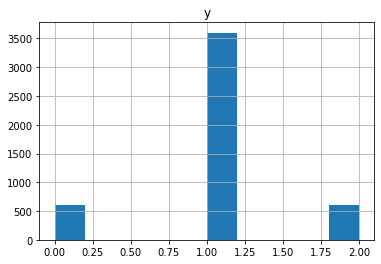

In [ ]:
print(y.hist())
print(y.head())

In [7]:
X_1, y_1, X_2, y_2 = two_step_utils.transform(X,y)

In [ ]:
# set apart a val set:
x_train, x_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
X_1, y_1, X_2, y_2 = two_step_utils.transform(x_train,y_train)

### check out the data in 2d with pca

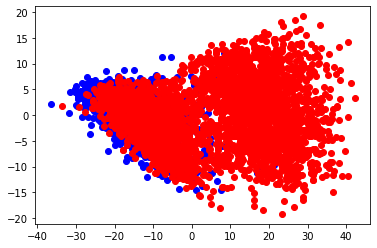

In [19]:
pca = PCA(n_components=2)
pca.fit(X_1)
X_pca = pca.transform(X_1)
X_pca = pd.DataFrame(X_pca)
idx_1 = np.where(y_1.y == 1)
idx_0 = np.where(y_1.y == 0)
#idx_2 = np.where(y_1.y == 2)

class_0 = pd.DataFrame(X_pca.iloc[idx_0])

class_1 = pd.DataFrame(X_pca.iloc[idx_1])
#class_2 = pd.DataFrame(X_pca.iloc[idx_2])

#print(class_1[0])

plt.scatter(class_0[0], class_0[1], c='b')
plt.scatter(class_1[0], class_1[1], c='r')
#plt.scatter(class_2[0], class_2[1], c='g')

plt.show()

[[<AxesSubplot:title={'center':'y'}>]]
[[<AxesSubplot:title={'center':'y'}>]]


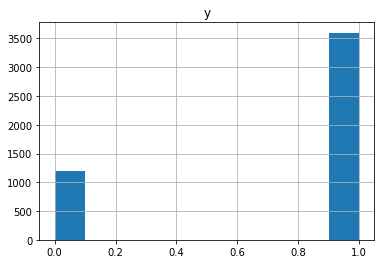

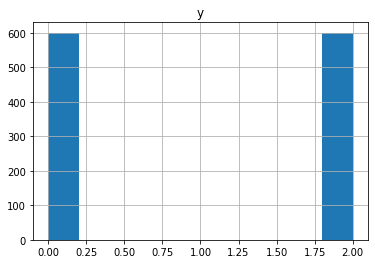

In [8]:
print(y_1.hist())
print(y_2.hist())

### TASK 1

### now oversample for the first task

In [ ]:
X_1, y_1 = Data_Augmentation.smote_resampling(X_1, y_1)

In [ ]:
rus = RandomUnderSampler(random_state=0)
X_1, y_1 = rus.fit_resample(X_1, y_1)


In [ ]:
sme = SMOTEENN(random_state=0)
X_2, y_2 = sme.fit_resample(X_2, y_2)

[[<AxesSubplot:title={'center':'y'}>]]


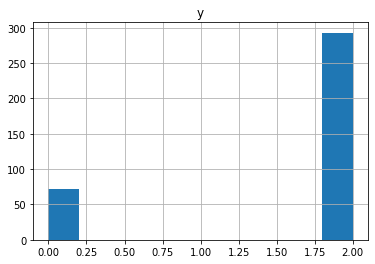

In [ ]:
print(y_2.hist())

In [9]:
clf = SVC(class_weight='balanced', gamma='auto')
scores = cross_val_score(clf, X_1,y_1, cv=3, scoring= 'balanced_accuracy')
print(scores)
print(np.mean(scores))

/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[0.80833333 0.835      0.83791667]
0.8270833333333334


In [10]:
rf_clf = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
scores = cross_val_score(rf_clf, X_1,y_1, cv=3, scoring= 'balanced_accuracy')
print(scores)
print(np.mean(scores))

/opt/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[0.69291667 0.68875    0.70083333]
0.6941666666666667


In [30]:
scores = list()
### crossvalidation:
cv = 10

for i in range(0,cv):
    print('----------')
    print(i)
    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    X_1, y_1, X_2, y_2 = two_step_utils.transform(x_train,y_train)
    X_val_1, y_val_1, X_val_2, y_val_2 = two_step_utils.transform(x_val, y_val)

    #rus = RandomUnderSampler(random_state=0, sampling_strategy=0.75)
    #X_1, y_1 = rus.fit_resample(X_1, y_1)
    weights = {0:10, 1: 1}
    clf_1 = SVC(class_weight=weights, gamma=0.001, kernel='rbf', C=1.0)

    clf_1 = clf_1.fit(X_1, y_1)

    y_pred = clf_1.predict(X_val_1)
    #print(y_pred_1_prob)
    #print(y_val)
    
    BMAC = balanced_accuracy_score(y_val_1, y_pred)
    scores.append(BMAC)
    print(BMAC)
    print(confusion_matrix(y_val_1, y_pred))


print(scores)
print(np.mean(scores))

----------
0
/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
0.8283797774135104
[[219  49]
 [111 581]]
----------
1
/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
0.8234238492918046
[[191  46]
 [115 608]]
----------
2
/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
0.8052905320347181
[[202  56]
 [121 581]]
----------
3
/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConvers

### TASK 2

In [ ]:
clf_2 = SVC(class_weight='balanced', gamma='scale', kernel='rbf', classification_gamma=)
scores = cross_val_score(clf_2, X_2,y_2, cv=3, scoring= 'balanced_accuracy')
print(scores)
print(np.mean(scores))

/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[0.9375     0.92729592 0.98969072]
0.9514955466722772
/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### combine the two classifications:

In [ ]:
# predict on everything and then set them together
# fit on data and check on val set
clf = clf.fit(X_1, y_1)
clf_2 = clf_2.fit(X_2, y_2)

y_pred_1 = clf.predict(x_val)
y_pred_2 = clf_2.predict(x_val)


/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
y_pred = two_step_utils.combine_predictions(y_pred_1, y_pred_2)
print(y_pred)

[2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
print(np.shape(y_pred_1))
print(np.shape(y_pred_2))
print(np.shape(y_pred))

(960,)
(960,)
(960,)


In [ ]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_val, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      0.46      0.48       132
     class 1       0.88      0.87      0.88       710
     class 2       0.54      0.64      0.59       118

    accuracy                           0.79       960
   macro avg       0.64      0.66      0.65       960
weighted avg       0.79      0.79      0.79       960



In [ ]:
BMAC = balanced_accuracy_score(y_val, y_pred)
print(BMAC)

0.6565151394585627


In [ ]:
print(confusion_matrix(y_val, y_pred))

[[ 61  48  23]
 [ 51 619  40]
 [ 10  33  75]]


In [ ]:
scores = list()
### crossvalidation:
cv = 10

for i in range(0,cv):
    print('----------')
    print(i)
    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    X_1, y_1, X_2, y_2 = two_step_utils.transform(x_train,y_train)


    clf_1 = SVC(class_weight='balanced', gamma=0.001, kernel='rbf', C=1.0, probability=True)
    clf_2 = SVC(class_weight='balanced', gamma=0.0001, kernel='rbf', C=5)

    clf_1 = clf_1.fit(X_1, y_1)
    clf_2 = clf_2.fit(X_2, y_2)

    y_pred_1_prob = clf_1.predict_proba(x_val)
    print(y_pred_1_prob)
    print(y_val)
    break
    for i in y_pred_1_prob:
        y_pred_1 = list()
        if y_pred_1_prob > 0.50:
            y_pred_1.append(1)
    y_pred_2 = clf_2.predict(x_val)

    y_pred = two_step_utils.combine_predictions(y_pred_1, y_pred_2)
    BMAC = balanced_accuracy_score(y_val, y_pred)
    scores.append(BMAC)
    print(BMAC)
    print(confusion_matrix(y_val, y_pred))


print(scores)
print(np.mean(scores))



----------
0
/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[[0.42887338 0.57112662]
 [0.57556009 0.42443991]
 [0.35017047 0.64982953]
 ...
 [0.01686407 0.98313593]
 [0.43948964 0.56051036]
 [0.03153286 0.96846714]]
      y
3656  1
939   2
2523  1
1163  1
2204  0
...  ..
4301  1
2808  2
3428  1
2136  1
4585  1

[960 rows x 1 columns]
[]
nan
/opt/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/venv/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: 

In [ ]:
a = (0.6823813062943498+0.7426575110069008+0.7022834596056353+0.6779686026249742+0.6823813062943498)/5
print(a)

0.697534437165242


In [ ]:
# predict on test data

clf_1 = SVC(class_weight='balanced', gamma='auto', kernel='linear', C=0.001)
clf_2 = SVC(class_weight='balanced', gamma='auto', kernel='linear', C=0.001)

clf_1 = clf_1.fit(X_1, y_1)
clf_2 = clf_2.fit(X_2, y_2)

y_pred_1 = clf_1.predict(x_test)
y_pred_2 = clf_2.predict(x_test)

y_pred = two_step_utils.combine_predictions(y_pred_1, y_pred_2)

# save them:
y_pred_pd = pd.DataFrame(data=y_pred, columns=["y"])
y_pred_pd.to_csv('../../Predictions/two_step_smoteenn_svc.csv', index_label='id')

/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
decision = bala

In [ ]:
print(y_pred_1_prob[np.where(y_val != 1),:])


[[[0.57556009 0.42443991]
  [0.30061945 0.69938055]
  [0.69435605 0.30564395]
  [0.01974271 0.98025729]
  [0.81684657 0.18315343]
  [0.84225719 0.15774281]
  [0.37150747 0.62849253]
  [0.52940353 0.47059647]
  [0.2318744  0.7681256 ]
  [0.23091014 0.76908986]
  [0.22657527 0.77342473]
  [0.935506   0.064494  ]
  [0.86827141 0.13172859]
  [0.8273992  0.1726008 ]
  [0.44764471 0.55235529]
  [0.79136464 0.20863536]
  [0.51470729 0.48529271]
  [0.29108688 0.70891312]
  [0.29651443 0.70348557]
  [0.63489919 0.36510081]
  [0.48978637 0.51021363]
  [0.72018818 0.27981182]
  [0.83848605 0.16151395]
  [0.65841181 0.34158819]
  [0.04683482 0.95316518]
  [0.01688905 0.98311095]
  [0.60581181 0.39418819]
  [0.60651356 0.39348644]
  [0.42592553 0.57407447]
  [0.43271933 0.56728067]
  [0.80723143 0.19276857]
  [0.80586105 0.19413895]
  [0.55941222 0.44058778]
  [0.77207219 0.22792781]
  [0.52627918 0.47372082]
  [0.78365274 0.21634726]
  [0.2212342  0.7787658 ]
  [0.51322244 0.48677756]
  [0.8942302